In [17]:
# IMPORT PYTHON LIBRARY
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import os
import re
from astropy.io import fits
from configparser import ConfigParser

# IMPORT TIPTO
from tiptop.tiptop import *
from configparser import ConfigParser

parser = ConfigParser()
parser.optionxform = str
rc("text", usetex=False)

In [18]:
import sys
#sys.path

In [19]:
# DEFINING PATHS
#inputDir = '/home/frossi/dev/TIPTOP/' # 
inputDir = '/raid1/guido/TIPTOP/INI/'
inputName = 'sphere'
outputDir = '/home/frossi/dev/TIPTOP/data/' 

sphere_tiptop_zeith30.0deg_psfs_wvl_550.0nm_nPSF1_seeing0.735632arcsec_L022.0m_iso2.3042962606561943arcsec

Vectorize the wavelength value to cope with the number of SCIENCE sources
No windPsdFile file is set.
%%%%%%%% ATTENTION %%%%%%%%
You must provide r0_Value or Seeing value, not both, 
Seeing parameter will be used, r0_Value will be discarded!



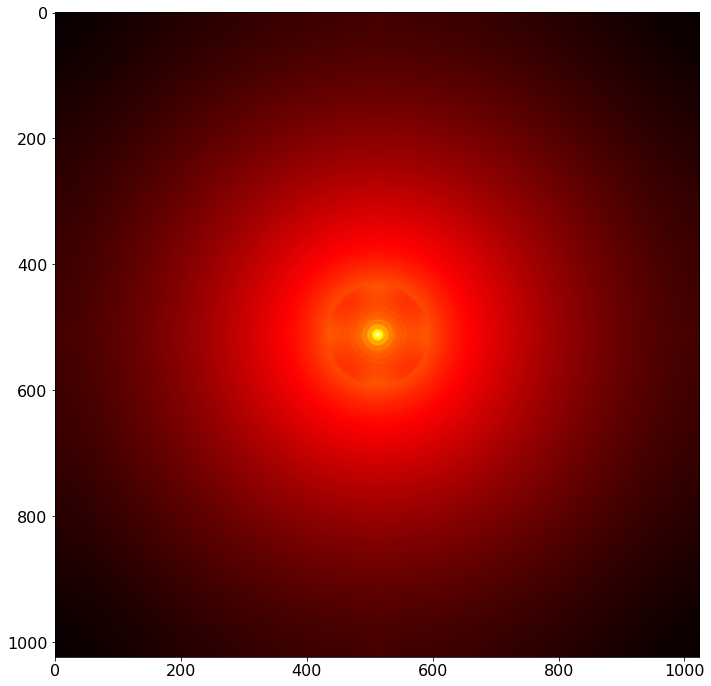

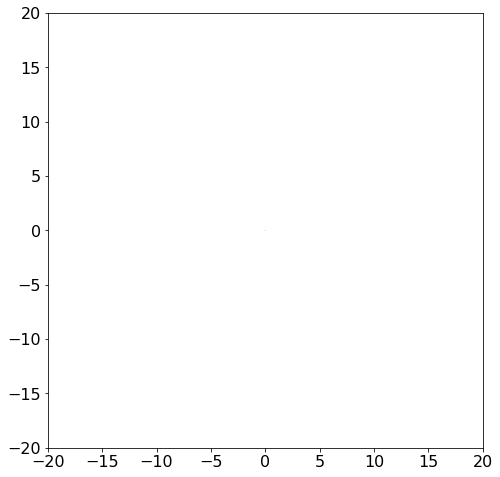

Output cube shape: (1, 1024, 1024)


In [20]:
# INSTANTIATING THE PARSER
inputFile_ini = inputDir + inputName + '.ini'
inputFile_yml = inputDir + inputName + '.yml'
parser = ConfigParser()
parser.optionxform = str
parser.read(inputFile_ini)
# NumberPhotons = eval(parser['sensor_LO']['NumberPhotons'])
Wavelength = (eval(parser['sources_science']['Wavelength']))[0]
SourceZenith = eval(parser['sources_science']['Zenith'])
n_psf = len(SourceZenith)
ZenithAngle = eval(parser['telescope']['ZenithAngle'])
Seeing = eval(parser['atmosphere']['Seeing'])
L0 = eval(parser['atmosphere']['L0'])
Cn2Weights = eval(parser['atmosphere']['Cn2Weights'])
Cn2Heights = eval(parser['atmosphere']['Cn2Heights'])
# ---------------------------
#Computation of the Cn2.dh profile using the seeing and the %Cn2.dh profile
cn2dhtot = (Seeing*np.pi/(180.*3600.)*(500.*1e-9)**(1.0/5.0)/5.25)**(5.0/3.0)
cn2dh = cn2dhtot*np.array(Cn2Weights)
#Isoplanatic angle
isoangle = 0.058*(500e-9)**(6.0/5.0)*np.sum(cn2dh*np.array(Cn2Heights)**(5./3.))**(-3.0/5.0)
isoangle = isoangle*180.*3600./np.pi #In arcsec 
# ---------------------------
# define the name of the .fits file
outputFile = 'sphere_tiptop_zeith' +str(ZenithAngle)+ 'deg'\
           + '_psfs_wvl_' + str(Wavelength*1e9) + 'nm_nPSF'\
           + str(n_psf) + '_seeing' + str(Seeing) + 'arcsec_L0'\
           + str(L0) + 'm_iso' + str(isoangle) + 'arcsec'
# run the computation
print(outputFile)
overallSimulation(inputDir, inputName, outputDir, outputFile, doConvolve=True, doPlot=True)

In [21]:
fao = fourierModel(inputFile_yml, calcPSF=False, display=False)
a = fits.getdata(outputDir + outputFile + '.fits')
print([FourierUtils.getFWHM(a[n], fao.ao.cam.psInMas, nargout=1) for n in range(n_psf)])
print([FourierUtils.getStrehl(a[n], fao.ao.tel.pupil, fao.freq.sampRef) for n in range(n_psf)])
#data = np.array([Y.reshape(-1), X.reshape(-1), Zenith, Azimuth])
#hdu = fits.PrimaryHDU(data)
#hdu.writeto(outputDir + "psfs_location_y_x_zenith_azimuth.fits")


[14.585641813356993]
[0.37491]


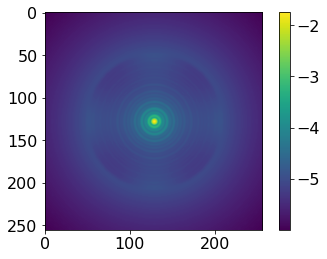

In [22]:
fig, _ = plt.subplots()
plt.imshow(np.log10(FourierUtils.cropSupport(a[0],4)))
plt.colorbar()